# waves
Modified for matlab import, with several shots

In [1]:
#import math
from scipy import io
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.integrate
import pandas as pd
from IPython.display import display
import time
import matplotlib.colors as colors
import random
import pandas as pd
import glob
import os

**main variables**
<br> f - main frequency (Hz)
<br> full_f - the entire time-frequency function (Hz) ("x" as x axis)
<br> frangemax - x axis length of Fourier-transform, note, that this does not affect Fourier calculation
<br> samples - sample points of the first graph
<br> s_rate - sample rate (Hz)
<br> amp - amplitude of signal
<br> randamp - amplitude of noise (random noise)
<br> <br> First, we create our signal and noise. In deafult: a sine wave, and a white noise.
<br> Or import one in.

In [2]:
#%%script false
path ='C:\\Users\\Marci\\Documents\\transientwaves\\imputdata\\in\\'#pc
#path ='C:\\Users\\win10\\Downloads\\transient-waves\\inputdata\\in\\'#laptop

i = 0
target_i = 0

for filename in glob.glob(os.path.join(path, '*.mat')):
    print(i, filename)
    if i == target_i:
        sav1 = io.loadmat(filename)
        print('Loaded')
    i += 1

0 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_28881.mat
Loaded
1 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32332.mat
2 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32333.mat
3 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32335.mat
4 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32342.mat
5 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32343.mat
6 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32344.mat
7 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32346.mat
8 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32347.mat
9 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32348.mat
10 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32349.mat
11 C:\Users\Marci\Documents\transientwaves\imputdata\in\MHA_32350.mat


In [13]:
#%%script false

print(sav1)
s=np.transpose(sav1['sig'])[0]
x=np.array(sav1['time'])[0]
print("\n", s)
shot_name='AUGD ' + str(sav1['shot'][0][0]) +', '+ os.path.basename(filename)[:3]+' '+ str(sav1['diag'][0])
print("\n",shot_name)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Aug  7 16:51:46 2019', '__version__': '1.0', '__globals__': [], 'shot': array([[28881]], dtype=uint16), 'diag': array(['B31-14'], dtype='<U6'), 'sig': array([[-0.09741204],
       [-0.15895042],
       [-9.26663021],
       ...,
       [-0.17946321],
       [-0.14869402],
       [-0.01536087]]), 'time': array([[0.0000000e+00, 5.0000000e-07, 1.0000000e-06, ..., 9.9999980e+00,
        9.9999985e+00, 9.9999990e+00]])}

 [-0.09741204 -0.15895042 -9.26663021 ... -0.17946321 -0.14869402
 -0.01536087]

 AUGD 28881, MHA B31-14


In [4]:
#%%script false
min_t=min(x)#1.4#
max_t=max(x)#2.1#

s = s.astype(float)
x = x.astype(float)
samples=s.size
full_f = np.zeros(samples)
t=max(x)-min(x)
nyquist=samples/2/t
frangemax=nyquist#250000#
xf=np.linspace(0.0, frangemax, frangemax*t+1)
s_rate=x.size/t

t=max_t-min_t
min_x=int(s_rate*min_t)
max_x=int(s_rate*max_t)
samples=max_x-min_x

x=x[min_x:max_x]
s=s[min_x:max_x]

print(max_t)
print(nyquist)
print(x.size)

9.999999
1000000.1000000099
19999999


C:\Users\Marci\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


The widget below controls the wisible range of the chart under it. Note that this is only for visualisation, the program calculates with the whole 0 - t range. The zooming is exponential. Value 0 displays the whole range.

## Short-time Fourier transform

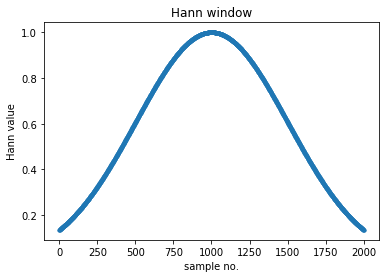

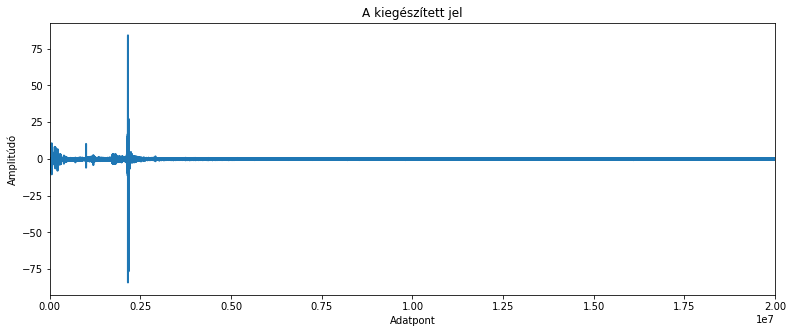

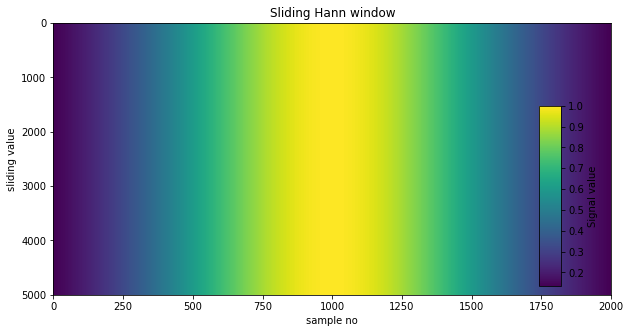

a
a
a
a
a
6.238444643316762e-08
46700468.19625396
500


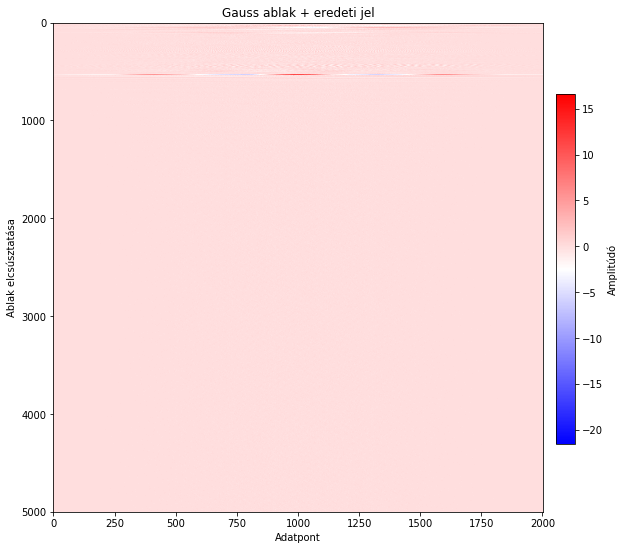

In [25]:
t0=time.time()
win_r = 1000 #1000
d_win=4000#random.randint(200,300)
std=500 #150
win_base = scipy.signal.gaussian(2*win_r+1, std=std)

plt.plot(win_base,".-")
plt.title('Hann window')
plt.xlabel('sample no.')
plt.ylabel('Hann value')
#plt.show()

z_padded_s = np.zeros (samples+2*win_r+1)
z_padded_s[win_r:-win_r] = s
z_padded_s[0:win_r]=np.average(z_padded_s[win_r+1:2*win_r])
z_padded_s[-win_r:]=np.average(z_padded_s[-2*win_r:-win_r-1])
x_win=np.linspace(0.0, t+(2*win_r/s_rate), samples+2*win_r)

plt.figure(figsize=(13,5))
plt.plot(z_padded_s,"-",linewidth = 2)#x_win,idő (s),max(x_win)
plt.xlim((0,samples+2*win_r))
plt.title('A kiegészített jel')
plt.xlabel('Adatpont')
plt.ylabel('Amplitúdó')
plt.show()

win = np.zeros((int(samples/d_win+1), 2*win_r+1))
for i in range(int(samples/d_win+1)):
    win [i]=win_base

plt.figure(figsize=(10,5))
plt.imshow(win,aspect='auto')
plt.title('Sliding Hann window')
plt.xlabel('sample no')
plt.ylabel('sliding value')
#plt.subplots_adjust(right=0.95)
cax = plt.axes([0.8, 0.15, 0.03, 0.5])
plt.colorbar(cax=cax).set_label('Signal value')
plt.show()

z_win = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    if i<1000001:
        z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1]-np.average(z_padded_s [d_win*i:d_win*i+win_r+win_r+1]))
    #z_win[i] = win[i] * (z_padded_s [d_win*i:d_win*i+win_r+win_r+1])

plt.figure(figsize=(9,9))
plt.imshow(z_win,aspect='auto',cmap='bwr')#, extent=(min_t*s_rate/d_win,max_t*s_rate/d_win,max_t*s_rate,min_t*s_rate)
plt.title('Gauss ablak + eredeti jel')
plt.xlabel('Adatpont')
plt.ylabel('Ablak elcsúsztatása')
plt.subplots_adjust(right=0.88)
cax = plt.axes([0.90, 0.23, 0.03, 0.54])
plt.colorbar(cax=cax).set_label('Amplitúdó')
plt.savefig('z_win.pdf')
#plt.show()

z_win_fft = np.zeros((int(samples/d_win+0.9), win_r*2+1))
for i in range(int(samples/d_win+0.9)):
    if i % 1000 == 0:
        print('a')
    if i<1000001:
        z_win_fft[i] = np.abs(scipy.fftpack.fft(z_win[i]))  
t1=time.time()

print(z_win_fft.min()**2)
print(z_win_fft.max()**2)
print(std)

In [20]:
z_win_fft_cutted = np.transpose(np.square(z_win_fft))[:int(frangemax*(2*win_r+1)/s_rate)]
        
print(z_win_fft.shape)
print(z_win_fft_cutted.shape)

(5000, 2001)
(1000, 5000)


C:\Users\Marci\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


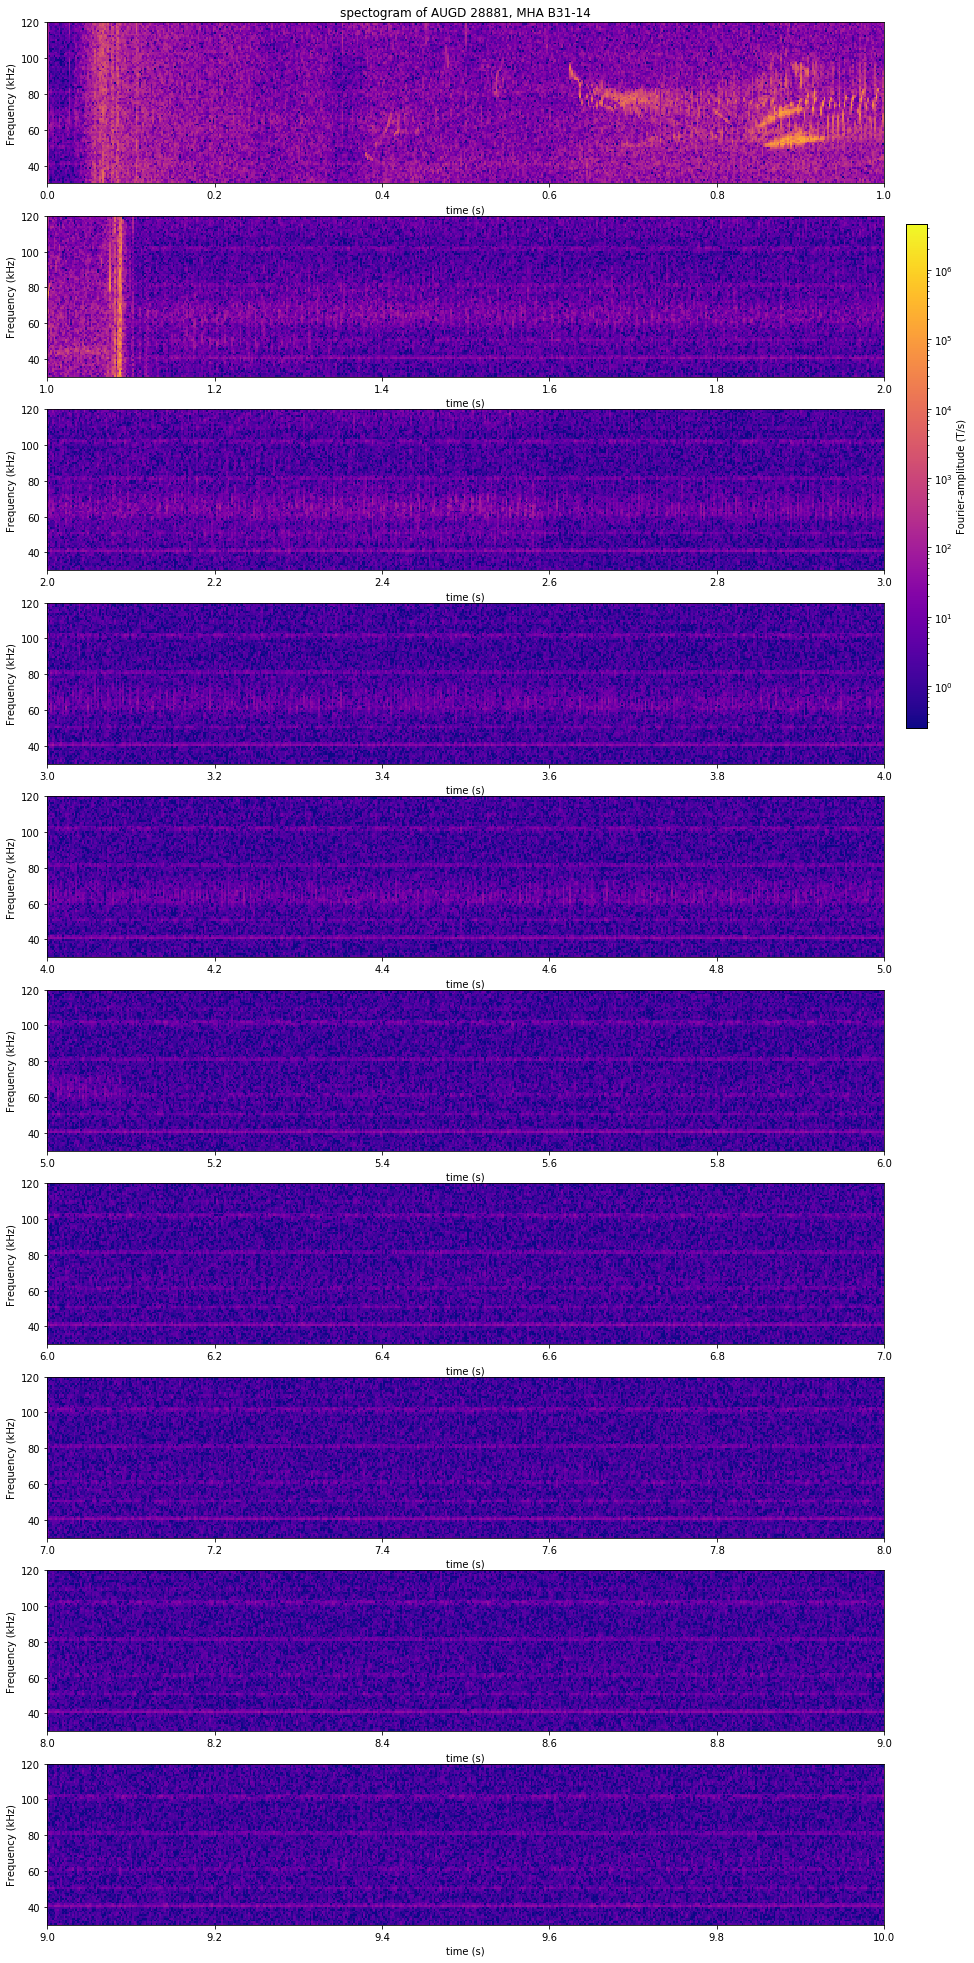

In [28]:
colornorm=colors.LogNorm(vmin=z_win_fft_cutted.min()*4000000, vmax=z_win_fft_cutted.max()/10)
logax = np.linspace(int(np.log10(z_win_fft_cutted.min())),int(np.log10(z_win_fft_cutted.max())),int(np.log10(z_win_fft_cutted.max()))-int(np.log10(z_win_fft_cutted.min()))+1)
logax = 10**logax
fig, ax = plt.subplots(figsize=(15,35))
#interpolation='gaussian',*30000000/4

plots=10

for i in range(plots):
    plt.subplot(plots,1,i+1)
    img = plt.imshow(z_win_fft_cutted,cmap='plasma',  aspect='auto', extent=[min_t,max_t,frangemax/1000,0], norm=colornorm)
    if i == 0:
        plt.title('spectogram of '+shot_name)
    plt.ylabel('Frequency (kHz)')
    plt.xlabel('time (s)')
    plt.ylim(120,30)
    plt.xlim(min_t+t/plots*i,min_t+t/plots*(i+1))
    plt.subplots_adjust(right=0.90)
    plt.gca().invert_yaxis()
    cbar=plt.colorbar(img,cax=plt.axes([0.92, 0.6, 0.02, 0.2]),ticks=None)
    cbar.set_label('Fourier-amplitude (T/s)')
    #cbar.set_ticks(logax)

plt.savefig(shot_name+' '+str(min_t)+'-'+str(max_t)+' stft.pdf')#34924_40
plt.show()